In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
from shapely.geometry import Point
%matplotlib inline

In [2]:
crimeWeek = pd.read_csv('crimeWeekly_NYC.csv')
crimeWeek = crimeWeek.iloc[:, 1:]
crimeWeek.head()

,Date,1000201,1000202,1000500,1000600,1000700,1000800,1000900,1001001,1001002,...,5027706,5027900,5029102,5029103,5029104,5030301,5030302,5031901,5031902,5032300
0,2007-12-31,1.0,4.0,NaN,1.0,4.0,3.0,3.0,1.0,2.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0
1,2008-01-07,1.0,NaN,NaN,NaN,4.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN
2,2008-01-14,NaN,1.0,NaN,NaN,2.0,2.0,2.0,NaN,1.0,...,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,2.0,1.0
3,2008-01-21,1.0,NaN,NaN,3.0,3.0,2.0,1.0,NaN,NaN,...,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
4,2008-01-28,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,1.0,...,NaN,NaN,1.0,1.0,NaN,1.0,NaN,2.0,2.0,1.0


In [3]:
crimeWeek.fillna(value=0, inplace=True)

In [4]:
X = crimeWeek.iloc[:, 1:].values
# X = X/X.sum(1).reshape(-1,1)
df = pd.concat((crimeWeek.Date, pd.DataFrame(X)), axis=1)
df.head()

,Date,0,1,2,3,4,5,6,7,8,...,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159
0,2007-12-31,1.0,4.0,0.0,1.0,4.0,3.0,3.0,1.0,2.0,...,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2008-01-07,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
2,2008-01-14,0.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0
3,2008-01-21,1.0,0.0,0.0,3.0,3.0,2.0,1.0,0.0,0.0,...,2.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2008-01-28,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,1.0


In [307]:
df.to_csv('AllData.csv')

In [5]:
df.columns = crimeWeek.columns

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel,RationalQuadratic,Exponentiation,ExpSineSquared

In [7]:
train_all = df.iloc[:470, :]
test_all = df.iloc[470:, :]

In [98]:
k1 = 1.* RBF(length_scale=5.0, length_scale_bounds=(1e-3, 100))# long term smooth rising trend
k2 = 1.* RBF(length_scale=4.0, length_scale_bounds=(1e-2, 10)) \
    * ExpSineSquared(length_scale=1.0, length_scale_bounds=(1e-2, 100), periodicity=52.0,
                     periodicity_bounds=(1e-05, 100.0))  # seasonal component
# medium term irregularities
# k3 = 1.* RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = WhiteKernel(noise_level=0.119,
                  noise_level_bounds=(1e-10, 1e2))

kernel = k1 + k2 + k4

In [99]:
gp = GaussianProcessRegressor(kernel=kernel)

In [ ]:
kernels = []
pred = []

for tract in df.columns[1:]:
    train = train_all[tract]
    test = test_all[tract]
    gp.fit(np.asarray(train.index).reshape(-1,1), np.asarray(train))
    y_pred = gp.predict(np.asarray(df.index).reshape(-1,1))
    pred.append(y_pred)
    kernels.append(gp.kernel_)
    
    print(tract)

1000201
1000202
1000500
1000600
1000700
1000800
1000900
1001001
1001002
1001200
1001300
1001401
1001402
1001501
1001502
1001600
1001800
1002000
1002100
1002201
1002202
1002400
1002500
1002601
1002602
1002700
1002800
1002900
1003001
1003002
1003100
1003200
1003300
1003400
1003601
1003602
1003700
1003800
1003900
1004000
1004100
1004200
1004300
1004400
1004500
1004700
1004800
1004900
1005000
1005200
1005400
1005501
1005502
1005600
1005700
1005800
1005900
1006000
1006100
1006200
1006300
1006400
1006500
1006600
1006700
1006800
1006900
1007000
1007100
1007200
1007300
1007400
1007500
1007600
1007700
1007800
1007900
1008000
1008100
1008200
1008300
1008400
1008601
1008602
1008603
1008700
1008800
1008900
1009000
1009100
1009200
1009300
1009400
1009500
1009600
1009700
1009800
1009900
1010000
1010100
1010200
1010300
1010400
1010601
1010602
1010800
1010900
1011000
1011100
1011201
1011202
1011203
1011300
1011401
1011402
1011500
1011600
1011700
1011800
1011900
1012000
1012100
1012200
1012400
1012500


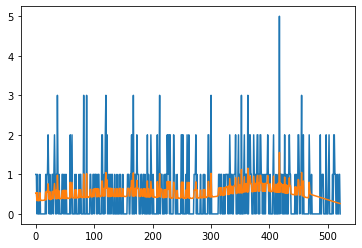

In [101]:
plt.plot(df['1000201'])
plt.plot(pred[0])

In [31]:
gp.kernel_

1**2 * RBF(length_scale=2) + 1**2 * RBF(length_scale=10) * ExpSineSquared(length_scale=1, periodicity=52) + WhiteKernel(noise_level=0.01)

In [296]:
df_pred2 = pd.DataFrame(pred).T
df_pred2.columns = crimeWeek.columns[1:]
df_pred2['Date'] = crimeWeek.Date
df_pred2.head()

,1000201,1000202,1000500,1000600,1000700,1000800,1000900,1001001,1001002,1001200,...,5027900,5029102,5029103,5029104,5030301,5030302,5031901,5031902,5032300,Date
0,0.528634,0.901393,0.0,1.445726,2.455633,1.703361,2.411338,0.187229,1.999977,0.724167,...,9.999982e-01,0.307509,0.788379,0.162343,0.280374,0.001350,6.781222e-09,0.295888,0.679045,2007-12-31
1,0.536845,0.841350,0.0,1.371364,2.454970,1.698547,1.152579,0.184025,0.000026,0.651308,...,1.120369e-06,0.307973,0.785480,0.164030,0.284099,1.997439,1.000000e+00,0.357539,0.683184,2008-01-07
2,0.335764,0.750386,0.0,1.400471,2.454061,1.693042,1.760389,0.180553,1.000001,0.848014,...,3.756012e-07,0.899037,0.784273,0.972904,0.287763,0.001575,1.000000e+00,1.356913,0.687282,2008-01-14
3,0.537019,0.692175,0.0,1.614029,2.452909,1.687991,1.131672,0.176914,0.000025,1.009274,...,4.720713e-07,1.490090,0.785761,0.972648,0.290999,0.001230,6.966045e-09,0.340409,0.691326,2008-01-21
4,0.332047,0.681278,0.0,1.490467,2.451513,1.684585,1.782731,0.173231,1.000000,0.600509,...,3.706133e-07,0.899910,0.790715,0.174070,0.293457,0.001409,2.000000e+00,1.337677,0.695326,2008-01-28


In [305]:
df.to_csv('finalData/WeekReal2017_1.csv')

In [303]:
df_pred2.to_csv('finalData/GPweekPred.csv')

In [282]:
rank1 = pd.DataFrame(df_pred2.sum())[:-1]
rank1.rename(columns={0:'predictedNum'}, inplace=True)
rank1.reset_index(inplace=True)
rank1.head()

,index,predictedNum
0,1000201,284.975
1,1000202,415.002
2,1000500,0.00951945
3,1000600,905.657
4,1000700,860.826


In [284]:
rank_True1 = pd.DataFrame(df.sum())[1:]
rank_True1.rename(columns={0:'trueNum'}, inplace=True)
rank_True1.reset_index(inplace=True)
rank_True1.head()

,index,trueNum
0,1000201,290
1,1000202,418
2,1000500,1
3,1000600,927
4,1000700,872


In [285]:
rankAll2 = rank1.merge(rank_True1, on='index')
rankAll2.head()

,index,predictedNum,trueNum
0,1000201,284.975,290
1,1000202,415.002,418
2,1000500,0.00951945,1
3,1000600,905.657,927
4,1000700,860.826,872


In [287]:
np.sqrt(mean_squared_error(rankAll2.trueNum, rankAll2.predictedNum))

334.0589651469934

In [117]:
df_pred2.to_csv('GP2pred_week.csv')

In [275]:
from sklearn.metrics import mean_squared_error

mse = []

for tract in df.columns[1:]:
    actual = df[tract]
    predicted = df_pred2[tract]
    mse.append(mean_squared_error(actual, predicted))

In [280]:
np.sum(mse)

2487.985363386302

In [112]:
rank = pd.DataFrame(df_pred2.iloc[470:, :].sum())[:-1]
rank.rename(columns={0:'predictedNum'}, inplace=True)
rank.reset_index(inplace=True)
rank.head()

,index,predictedNum
0,1000201,19.6123
1,1000202,39.8559
2,1000500,0
3,1000600,92.3425
4,1000700,65.6457


In [113]:
rank_True = pd.DataFrame(test_all.sum())[1:]
rank_True.rename(columns={0:'trueNum'}, inplace=True)
rank_True.reset_index(inplace=True)
rank_True.head()

,index,trueNum
0,1000201,21
1,1000202,38
2,1000500,0
3,1000600,108
4,1000700,72


In [114]:
rankAll = rank.merge(rank_True, on='index')
rankAll.head()

,index,predictedNum,trueNum
0,1000201,19.6123,21
1,1000202,39.8559,38
2,1000500,0,0
3,1000600,92.3425,108
4,1000700,65.6457,72


In [281]:
mean_squared_error(rankAll.trueNum, rankAll.predictedNum)

1293.3316788057941

In [116]:
rankAll.to_csv('GP2_pred.csv')

In [118]:
X = rankAll[['predictedNum', 'trueNum']].values
X = X/X.sum(0)
rankAll['predictedPerc'] = X[:, 0]
rankAll['truePerc'] = X[:, 1]
rankAll_pred = rankAll.sort_values(by='predictedPerc', ascending=False)
rankAll_pred.head()

,index,predictedNum,trueNum,predictedPerc,truePerc
106,1010900,527.617,443,0.00756632,0.00459234
119,1011900,420.134,402,0.00602496,0.00416731
325,2006500,327.602,361,0.004698,0.00374229
187,1018200,266.393,176,0.00382022,0.0018245
49,1005200,259.611,283,0.00372297,0.00293371


In [289]:
rankAll.to_csv('rankAllGP.csv')

In [119]:
rankAll_true = rankAll.sort_values(by='truePerc', ascending=False)
rankAll_true.head()

,index,predictedNum,trueNum,predictedPerc,truePerc
106,1010900,527.617,443,0.00756632,0.00459234
119,1011900,420.134,402,0.00602496,0.00416731
287,2000100,44.7125,387,0.000641203,0.00401182
325,2006500,327.602,361,0.004698,0.00374229
49,1005200,259.611,283,0.00372297,0.00293371


In [130]:
rank_race = race.merge(rankAll_pred, right_on='index', left_on='boro_ct201')
rank_race_pred = rank_race.sort_values(by='predictedPerc', ascending=False)
rank_race_pred.head()

,boro_ct201,GEOID,lat,lng,Total,white,black,asian,other,geometry,index,predictedNum,trueNum,predictedPerc,truePerc
974,1010900,36061010900,40.752250,-73.989703,179,111,13,49,11,POINT (-73.9897027784 40.7522504853),1010900,527.617,443,0.00756632,0.00459234
1794,1011900,36061011900,40.757315,-73.986025,1027,389,511,19,159,POINT (-73.98602468209999 40.7573151165),1011900,420.134,402,0.00602496,0.00416731
829,2006500,36005006500,40.817398,-73.921659,5471,903,1727,84,2984,POINT (-73.9216592084 40.8173983582),2006500,327.602,361,0.004698,0.00374229
1835,1018200,36061018200,40.798321,-73.941851,8147,1126,2708,512,4435,POINT (-73.94185108479999 40.7983211307),1018200,266.393,176,0.00382022,0.0018245
980,1005200,36061005200,40.737436,-73.990455,3642,2869,107,609,66,POINT (-73.99045544170001 40.7374356034),1005200,259.611,283,0.00372297,0.00293371


In [131]:
rank_race_true = rank_race.sort_values(by='truePerc', ascending=False)
rank_race_true.head()

,boro_ct201,GEOID,lat,lng,Total,white,black,asian,other,geometry,index,predictedNum,trueNum,predictedPerc,truePerc
974,1010900,36061010900,40.752250,-73.989703,179,111,13,49,11,POINT (-73.9897027784 40.7522504853),1010900,527.617,443,0.00756632,0.00459234
1794,1011900,36061011900,40.757315,-73.986025,1027,389,511,19,159,POINT (-73.98602468209999 40.7573151165),1011900,420.134,402,0.00602496,0.00416731
1924,2000100,36005000100,40.792722,-73.883603,7411,1464,4509,125,1403,POINT (-73.88360337909999 40.7927222018),2000100,44.7125,387,0.000641203,0.00401182
829,2006500,36005006500,40.817398,-73.921659,5471,903,1727,84,2984,POINT (-73.9216592084 40.8173983582),2006500,327.602,361,0.004698,0.00374229
980,1005200,36061005200,40.737436,-73.990455,3642,2869,107,609,66,POINT (-73.99045544170001 40.7374356034),1005200,259.611,283,0.00372297,0.00293371


In [222]:
numIntervene = []
crimeCap_pred = []
crimeCap_real = []
white_wop = []
black_wop = []
asian_wop = []
other_wop = []

crime_pred = 0
crime_real = 0
w = 0
b = 0
a = 0
o = 0
tot = 0
for i in range(len(rank_race_pred)):
    numIntervene.append(i+1)
    crime_pred = crime_pred + rank_race_pred['predictedPerc'].values[i]
    crime_real = crime_real + rank_race_true['truePerc'].values[i]
    crimeCap_pred.append(crime_pred)
    crimeCap_real.append(crime_real)
    w = w + rank_race_pred['white'].values[i]
    b = b + rank_race_pred['black'].values[i]
    a = a + rank_race_pred['asian'].values[i]
    o = o + rank_race_pred['other'].values[i]
    tot = tot + rank_race_pred['Total'].values[i]
    white_wop.append(float(w)/float(tot))
    black_wop.append(float(b)/float(tot))
    asian_wop.append(float(a)/float(tot))
    other_wop.append(float(o)/float(tot))

In [223]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [232]:
p = figure(title="racial distribution",
           x_range=(0, 2100), y_range=(0, 0.75),
           background_fill_color="#fafafa", x_axis_label='number of tracts to intervene', 
          y_axis_label='fraction of demographics distribution')

p.line(numIntervene, white_wop, legend="%white",
       line_color="red", line_dash="dashed")

p.line(numIntervene, black_wop, legend="%black",
       line_color="blue", line_dash="dashed")
p.line(numIntervene, asian_wop, legend="%asian",
       line_color="green", line_dash="dashed")
p.line(numIntervene, other_wop, legend="%other",
       line_color="black", line_dash="dashed")

show(p)

In [226]:
from bokeh.palettes import brewer
from bokeh.core.properties import value
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette

In [227]:
temp_wop = pd.DataFrame({'white':white_wop, 'black':black_wop, 'asian':asian_wop, 'other': other_wop})
temp_wop = temp[:100]
temp_wop.head()

,white,black,asian,other
0,0.151301,0.121993,0.405300,0.371718
1,0.172849,0.119694,0.418547,0.340535
2,0.144515,0.128824,0.480749,0.293315
3,0.201959,0.312916,0.308151,0.210662
4,0.194318,0.299912,0.331505,0.207214


In [229]:
p = figure(x_range=(0, 100), y_range=(0, 1), x_axis_label='Number of tracts to intervene', 
          y_axis_label='fraction of demographics distribution')
p.grid.minor_grid_line_color = '#eeeeee'

names = list(temp_wop.columns)
p.varea_stack(stackers=names, x='index', color=brewer['Spectral'][4], legend=[value(x) for x in names], source=temp_wop)


show(p)

In [153]:
op_ratio = pd.read_csv('df_op.csv')
op_ratio = op_ratio.iloc[:, 1:]
op_ratio['boro_ct201'] = op_ratio['boro_ct201'].astype(int)
op_ratio.head()

,boro_ct201,overpolicing
0,4046200,1.632706
1,4045000,1.486929
2,4045400,0.644933
3,4045500,1.903269
4,4045600,1.840960


In [156]:
rank_race_pred.boro_ct201 = rank_race_pred.boro_ct201.astype(int)

In [163]:
rank_race_predOP = rank_race_pred.merge(op_ratio, on='boro_ct201')
rank_race_predOP = rank_race_predOP[rank_race_predOP.predictedNum > -0.0001 ]
rank_race_predOP.replace({'predictedNum':{0:10}}, inplace=True)
rank_race_predOP.head()

,boro_ct201,GEOID,lat,lng,Total,white,black,asian,other,geometry,index,predictedNum,trueNum,predictedPerc,truePerc,overpolicing
0,1010900,36061010900,40.752250,-73.989703,179,111,13,49,11,POINT (-73.9897027784 40.7522504853),1010900,527,443,0.00756632,0.00459234,1.025468
1,1011900,36061011900,40.757315,-73.986025,1027,389,511,19,159,POINT (-73.98602468209999 40.7573151165),1011900,420,402,0.00602496,0.00416731,0.524376
2,2006500,36005006500,40.817398,-73.921659,5471,903,1727,84,2984,POINT (-73.9216592084 40.8173983582),2006500,327,361,0.004698,0.00374229,0.523698
3,1018200,36061018200,40.798321,-73.941851,8147,1126,2708,512,4435,POINT (-73.94185108479999 40.7983211307),1018200,266,176,0.00382022,0.0018245,0.559346
4,1005200,36061005200,40.737436,-73.990455,3642,2869,107,609,66,POINT (-73.99045544170001 40.7374356034),1005200,259,283,0.00372297,0.00293371,2.849947


In [164]:
rank_race_predOP['predOP'] = rank_race_predOP['predictedNum']*rank_race_predOP['overpolicing']
rank_race_predOP.head()

,boro_ct201,GEOID,lat,lng,Total,white,black,asian,other,geometry,index,predictedNum,trueNum,predictedPerc,truePerc,overpolicing,predOP
0,1010900,36061010900,40.752250,-73.989703,179,111,13,49,11,POINT (-73.9897027784 40.7522504853),1010900,527,443,0.00756632,0.00459234,1.025468,540.421722
1,1011900,36061011900,40.757315,-73.986025,1027,389,511,19,159,POINT (-73.98602468209999 40.7573151165),1011900,420,402,0.00602496,0.00416731,0.524376,220.237866
2,2006500,36005006500,40.817398,-73.921659,5471,903,1727,84,2984,POINT (-73.9216592084 40.8173983582),2006500,327,361,0.004698,0.00374229,0.523698,171.249314
3,1018200,36061018200,40.798321,-73.941851,8147,1126,2708,512,4435,POINT (-73.94185108479999 40.7983211307),1018200,266,176,0.00382022,0.0018245,0.559346,148.786108
4,1005200,36061005200,40.737436,-73.990455,3642,2869,107,609,66,POINT (-73.99045544170001 40.7374356034),1005200,259,283,0.00372297,0.00293371,2.849947,738.136257


In [167]:
X = rank_race_predOP[['predOP']].values
X = X/X.sum(0)
rank_race_predOP['predOPPerc'] = X[:, 0]
#rankAll['truePerc'] = X[:, 1]
rank_race_predOP_sort = rank_race_predOP.sort_values(by='predOPPerc', ascending=False)
rank_race_predOP_sort.head()

,boro_ct201,GEOID,lat,lng,Total,white,black,asian,other,geometry,index,predictedNum,trueNum,predictedPerc,truePerc,overpolicing,predOP,predOPPerc
19,1018900,36061018900,40.797328,-73.964251,12236,4299,3344,821,4349,POINT (-73.96425079710001 40.7973281346),1018900,180,151,0.00259467,0.00156533,13.954255,2511.765944,0.020226
8,2046201,36005046201,40.874377,-73.827322,28937,5008,17020,396,7809,POINT (-73.8273215766 40.8743770462),2046201,207,255,0.00297265,0.00264345,4.866313,1007.326700,0.008112
45,1004200,36061004200,40.731800,-73.989367,5197,3734,232,1087,270,POINT (-73.9893669665 40.7317996124),1004200,126,70,0.00181785,0.000725652,6.633990,835.882765,0.006731
256,1007000,36061007000,40.743185,-73.976961,8574,5581,526,1931,812,POINT (-73.97696138569999 40.7431849669),1007000,62,92,0.000897168,0.000953714,13.382360,829.706291,0.006681
14,1011300,36061011300,40.754775,-73.987870,115,21,26,65,6,POINT (-73.9878702085 40.7547752156),1011300,196,162,0.00281419,0.00167937,3.830732,750.823457,0.006046


In [170]:
rank_race_predOP_sort_true = rank_race_predOP.sort_values(by='truePerc', ascending=False)

In [267]:
numIntervene = []
crimeCap_pred = []
crimeCap_true = []
crimeCap_predNum = []
crimeCap_trueNum = []

crime_pred = 0
crime_real = 0
crime_predNum = 0
crime_trueNum = 0
for i in range(len(rank_race_predOP_sort)):
    numIntervene.append(i+1)
    crime_pred = crime_pred + rank_race_predOP_sort['predOPPerc'].values[i]
    crime_real = crime_real + rank_race_predOP_sort_true['truePerc'].values[i]
    crime_predNum = crime_predNum + rank_race_predOP_sort['predOP'].values[i]
    crime_trueNum = crime_trueNum + rank_race_predOP_sort_true['trueNum'].values[i]
    crimeCap_pred.append(crime_pred)
    crimeCap_true.append(crime_real)
    crimeCap_predNum.append(crime_predNum)
    crimeCap_trueNum.append(crime_trueNum)

In [268]:
p = figure(title="Accuracy of GP (incorporating over-policing) model",
           x_range=(0, 2100), y_range=(0, 1),
           background_fill_color="#fafafa", x_axis_label='number of tracts to intervene', 
          y_axis_label='% of crime captured')

p.line(numIntervene, crimeCap_true, legend="True",
       line_color="red", line_dash="dashed")

p.line(numIntervene, crimeCap_pred, legend="Predicted",
       line_color="blue", line_dash="dashed")

show(p)

In [273]:
p = figure(title="Accuracy of GP (incorporating over-policing) model",
           x_range=(0, 2100), y_range=(0, 130000),
           background_fill_color="#fafafa", x_axis_label='number of tracts to intervene', 
          y_axis_label='Number of crime captured')

p.line(numIntervene, crimeCap_trueNum, legend="True",
       line_color="red", line_dash="dashed")

p.line(numIntervene, crimeCap_predNum, legend="Predicted",
       line_color="blue", line_dash="dashed")

show(p)

In [274]:
# fig = plt.figure(figsize=(20,8))

# ax1 = fig.add_subplot(121)
# plt.plot(numIntervene, crimeCap_true, color='coral', linewidth=3, label='True')
# plt.plot(numIntervene, crimeCap_pred, 'k--', linewidth=3, label='Predicted')
# plt.xlabel('number of tracts to intervene',  fontsize=15)
# plt.ylabel('% crime captured', fontsize=15)
# plt.grid(True)
# plt.legend(fontsize=15)

# ax2 = fig.add_subplot(122)
# plt.plot(numIntervene, crimeCap_predNum, color='coral', linewidth=3, label='True')
# plt.plot(numIntervene, crimeCap_trueNum, 'k--', linewidth=3, label='Predicted')
# plt.xlabel('number of tracts to intervene',  fontsize=15)
# plt.ylabel('number of crime captured', fontsize=15)
# plt.grid(True)
# plt.legend(fontsize=15)

In [246]:
numIntervene = []
crimeCap_pred = []
crimeCap_real = []
whiteOP = []
blackOP = []
asianOP = []
otherOP = []

crime_pred = 0
crime_real = 0
w = 0
b = 0
a = 0
o = 0
tot = 0
for i in range(len(rank_race_predOP_sort)):
    numIntervene.append(i+1)
    crime_pred = crime_pred + rank_race_predOP_sort['predOPPerc'].values[i]
    crime_real = crime_real + rank_race_predOP_sort_true['truePerc'].values[i]
    crimeCap_pred.append(crime_pred)
    crimeCap_real.append(crime_real)
    w = w + rank_race_predOP_sort['white'].values[i]
    b = b + rank_race_predOP_sort['black'].values[i]
    a = a + rank_race_predOP_sort['asian'].values[i]
    o = o + rank_race_predOP_sort['other'].values[i]
    tot = tot + rank_race_predOP_sort['Total'].values[i]
    whiteOP.append(float(w)/float(tot))
    blackOP.append(float(b)/float(tot))
    asianOP.append(float(a)/float(tot))
    otherOP.append(float(o)/float(tot))

In [256]:
p = figure(title="racial distribution",
           x_range=(0, 2100), y_range=(0, 1),
           background_fill_color="#fafafa", x_axis_label='Number of tracts to intervene', 
          y_axis_label='fraction of demographics distribution')

p.line(numIntervene, whiteOP, legend="%white",
       line_color="red", line_dash="dashed")

p.line(numIntervene, blackOP, legend="%black",
       line_color="blue", line_dash="dashed")
p.line(numIntervene, asianOP, legend="%asian",
       line_color="green", line_dash="dashed")
p.line(numIntervene, otherOP, legend="%other",
       line_color="black", line_dash="dashed")

show(p)

In [253]:
tempOP = pd.DataFrame({'white':whiteOP, 'black':blackOP, 'asian':asianOP, 'other': otherOP})
tempOP = tempOP
tempOP.head()

,white,black,asian,other
0,0.351340,0.273292,0.067097,0.355427
1,0.226046,0.494596,0.029558,0.295291
2,0.281238,0.444166,0.049687,0.268018
3,0.338927,0.384428,0.077078,0.240973
4,0.338600,0.384097,0.078098,0.240578


In [257]:
p = figure(x_range=(0, 2100), y_range=(0, 1), x_axis_label='Number of tracts to intervene', 
          y_axis_label='fraction of demographics distribution')
p.grid.minor_grid_line_color = '#eeeeee'

names = list(tempOP.columns)
p.varea_stack(stackers=names, x='index', color=brewer['Spectral'][4], legend=[value(x) for x in names], source=tempOP)

show(p)

In [315]:
race.boro_ct201 = race.boro_ct201.astype(int)

In [316]:
RFagg_sort = pd.read_csv('RFagg_sort.csv')
RFagg_race = RFagg_sort.merge(race, on='boro_ct201')
RFagg_race.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,...,Predperc,GEOID,lat,lng,Total,white,black,asian,other,geometry_y
0,539,1,1011900,Manhattan,I,11900,119.0,MN17,Midtown-Midtown South,3807,...,0.003941,36061011900,40.757315,-73.986025,1027,389,511,19,159,POINT (-73.98602468209999 40.7573151165)
1,1208,1,1010900,Manhattan,I,10900,109.0,MN17,Midtown-Midtown South,3807,...,0.003897,36061010900,40.752250,-73.989703,179,111,13,49,11,POINT (-73.9897027784 40.7522504853)
2,1561,1,1007600,Manhattan,I,7600,76.0,MN17,Midtown-Midtown South,3807,...,0.002741,36061007600,40.747567,-73.987298,2055,910,81,996,82,POINT (-73.9872980114 40.7475672272)
3,1808,1,1005200,Manhattan,I,5200,52.0,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3807,...,0.002664,36061005200,40.737436,-73.990455,3642,2869,107,609,66,POINT (-73.99045544170001 40.7374356034)
4,1563,1,1010100,Manhattan,I,10100,101.0,MN17,Midtown-Midtown South,3807,...,0.002662,36061010100,40.749731,-73.991541,1225,676,91,429,53,POINT (-73.9915412432 40.74973140260001)


In [333]:
numIntervene = []
#crimeCap_pred = []
#crimeCap_real = []
whiteRF = []
blackRF = []
asianRF = []
otherRF = []

crime_pred = 0
crime_real = 0
w = 0
b = 0
a = 0
o = 0
tot = 0
for i in range(len(RFagg_race)):
    numIntervene.append(i+1)
    #print(i)
    #crime_pred = crime_pred + rank_race_predOP_sort['predOPPerc'].values[i]
    #crime_real = crime_real + rank_race_predOP_sort_true['truePerc'].values[i]
    #crimeCap_pred.append(crime_pred)
    #crimeCap_real.append(crime_real)
    w = w + RFagg_race['white'].values[i]
    b = b + RFagg_race['black'].values[i]
    a = a + RFagg_race['asian'].values[i]
    o = o + RFagg_race['other'].values[i]
    tot = tot + RFagg_race['Total'].values[i]
    whiteRF.append(float(w)/float(tot))
    blackRF.append(float(b)/float(tot))
    asianRF.append(float(a)/float(tot))
    otherRF.append(float(o)/float(tot))

In [334]:
tempRF = pd.DataFrame({'white':whiteRF, 'black':blackRF, 'asian':asianRF, 'other': otherRF})
#tempRF = tempRF
tempRF.head()

,white,black,asian,other
0,0.378773,0.497566,0.018500,0.154820
1,0.414594,0.434494,0.056385,0.140962
2,0.432383,0.185526,0.326280,0.077277
3,0.619875,0.103144,0.242358,0.046067
4,0.609621,0.098794,0.258612,0.045645


In [337]:
p = figure(x_range=(0, 49), y_range=(0, 1), x_axis_label='Number of tracts to intervene', 
          y_axis_label='fraction of demographics distribution', plot_width=500, plot_height=500)
p.grid.minor_grid_line_color = '#eeeeee'

names = list(tempRF.columns)
p.varea_stack(stackers=names, x='index', color=brewer['Spectral'][4], legend=[value(x) for x in names], source=tempRF)

show(p)

In [349]:
RFop_sort = pd.read_csv('rfOP_sort.csv')
RFop_race = RFop_sort.merge(race, on='boro_ct201')
RFop_race.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,...,0,GEOID,lat,lng,Total,white,black,asian,other,geometry_y
0,1164,1,1022900,Manhattan,E,22900,229.00,MN04,Hamilton Heights,3802,...,3983.370199,36061022900,40.827010,-73.954492,8781,2636,2377,298,5098,POINT (-73.954492354 40.8270098095)
1,1475,1,1018900,Manhattan,E,18900,189.00,MN12,Upper West Side,3806,...,2019.041192,36061018900,40.797328,-73.964251,12236,4299,3344,821,4349,POINT (-73.96425079710001 40.7973281346)
2,1742,2,2038900,Bronx,E,38900,389.00,BX06,Belmont,3705,...,1918.138201,36005038900,40.856400,-73.884998,6040,1822,754,114,3416,POINT (-73.88499765669999 40.8564000819)
3,754,1,1007000,Manhattan,I,7000,70.00,MN20,Murray Hill-Kips Bay,3808,...,1227.296193,36061007000,40.743185,-73.976961,8574,5581,526,1931,812,POINT (-73.97696138569999 40.7431849669)
4,1573,2,2046201,Bronx,I,46201,462.01,BX13,Co-op City,3703,...,1172.538011,36005046201,40.874377,-73.827322,28937,5008,17020,396,7809,POINT (-73.8273215766 40.8743770462)


In [350]:
numIntervene = []
#crimeCap_pred = []
#crimeCap_real = []
whiteRFop = []
blackRFop = []
asianRFop = []
otherRFop = []

crime_pred = 0
crime_real = 0
w = 0
b = 0
a = 0
o = 0
tot = 0
for i in range(len(RFop_race)):
    numIntervene.append(i+1)
    #print(i)
    #crime_pred = crime_pred + rank_race_predOP_sort['predOPPerc'].values[i]
    #crime_real = crime_real + rank_race_predOP_sort_true['truePerc'].values[i]
    #crimeCap_pred.append(crime_pred)
    #crimeCap_real.append(crime_real)
    w = w + RFop_race['white'].values[i]
    b = b + RFop_race['black'].values[i]
    a = a + RFop_race['asian'].values[i]
    o = o + RFop_race['other'].values[i]
    tot = tot + RFop_race['Total'].values[i]
    whiteRFop.append(float(w)/float(tot))
    blackRFop.append(float(b)/float(tot))
    asianRFop.append(float(a)/float(tot))
    otherRFop.append(float(o)/float(tot))

In [351]:
tempRFop = pd.DataFrame({'white':whiteRFop, 'black':blackRFop, 'asian':asianRFop, 'other': otherRFop})
#tempRF = tempRF
tempRFop.head()

,white,black,asian,other
0,0.300194,0.270698,0.033937,0.580572
1,0.329971,0.272208,0.053243,0.449493
2,0.323650,0.239310,0.045570,0.475404
3,0.402402,0.196486,0.088799,0.383795
4,0.299622,0.372026,0.055136,0.332734


In [352]:
p = figure(x_range=(0, 49), y_range=(0, 1), x_axis_label='Number of tracts to intervene', 
          y_axis_label='fraction of demographics distribution', plot_width=500, plot_height=500)
p.grid.minor_grid_line_color = '#eeeeee'

names = list(tempRFop.columns)
p.varea_stack(stackers=names, x='index', color=brewer['Spectral'][4], legend=[value(x) for x in names], source=tempRFop)

show(p)